In [ ]:
#Basic AstroCV example
#Detect galaxies on a sample image
import pyyolo
import numpy as np
import sys
from PIL import Image, ImageEnhance
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import time
import urllib.request

In [2]:
darknet_path = './data/darknet' #darknet path
datacfg = '../sdss.data' #relative to darknet path
cfgfile = '../sdss.cfg' #relative to darknet path
weightfile = '/data/astrocv/galaxy_sdss_hic.weights'
filename = 'data/1140_301_1_206.jpg' #image sample 1
#filename = 'data/1045_301_2_129.jpg' #image sample 2

url = "https://cdn.spacetelescope.org/archives/images/large/heic0916a.jpg"
urllib.request.urlretrieve(url,"downloadedt.jpg")
filename='downloaded.jpg'
thresh = 0.04  #detection threshold
hier_thresh = 0.5

In [3]:
img = Image.open('downloadedt.jpg')
brightness = ImageEnhance.Brightness(img)
img2 = brightness.enhance(0.9)
#contrast= ImageEnhance.Contrast(img2)
#img3 = contrast.enhance(2)
coll= ImageEnhance.Color(img2)
img3= coll.enhance(0.8)
img3.save("downloaded.jpg")

In [4]:
t1=time.time()
pyyolo.init(darknet_path, datacfg, cfgfile, weightfile) #init and load network
print('Initialization time = %5.3f seconds'%(time.time()-t1))
t1=time.time()
outputs = pyyolo.test(filename, thresh, hier_thresh, 0) #load image and process
print('Image processing time = %5.3f seconds'%(time.time()-t1))
for output in outputs:
        print(output)
pyyolo.cleanup()

Initialization time = 3.954 seconds
Image processing time = 0.559 seconds
{'prob': 0.04258670285344124, 'left': 1703, 'class': 'Edge-on', 'bottom': 82, 'right': 1770, 'top': 22}
{'prob': 0.16557209193706512, 'left': 177, 'class': 'Elliptical ', 'bottom': 230, 'right': 218, 'top': 186}
{'prob': 0.41873690485954285, 'left': 631, 'class': 'Elliptical ', 'bottom': 281, 'right': 702, 'top': 217}
{'prob': 0.13760218024253845, 'left': 1164, 'class': 'Edge-on', 'bottom': 273, 'right': 1226, 'top': 218}
{'prob': 0.1326388269662857, 'left': 1682, 'class': 'Edge-on', 'bottom': 356, 'right': 1746, 'top': 286}
{'prob': 0.18693985044956207, 'left': 1904, 'class': 'Elliptical ', 'bottom': 416, 'right': 1949, 'top': 369}
{'prob': 0.06359639018774033, 'left': 2297, 'class': 'Spiral', 'bottom': 445, 'right': 2344, 'top': 390}
{'prob': 0.2152971625328064, 'left': 322, 'class': 'Edge-on', 'bottom': 770, 'right': 385, 'top': 687}
{'prob': 0.04438421502709389, 'left': 1098, 'class': 'Edge-on', 'bottom': 887

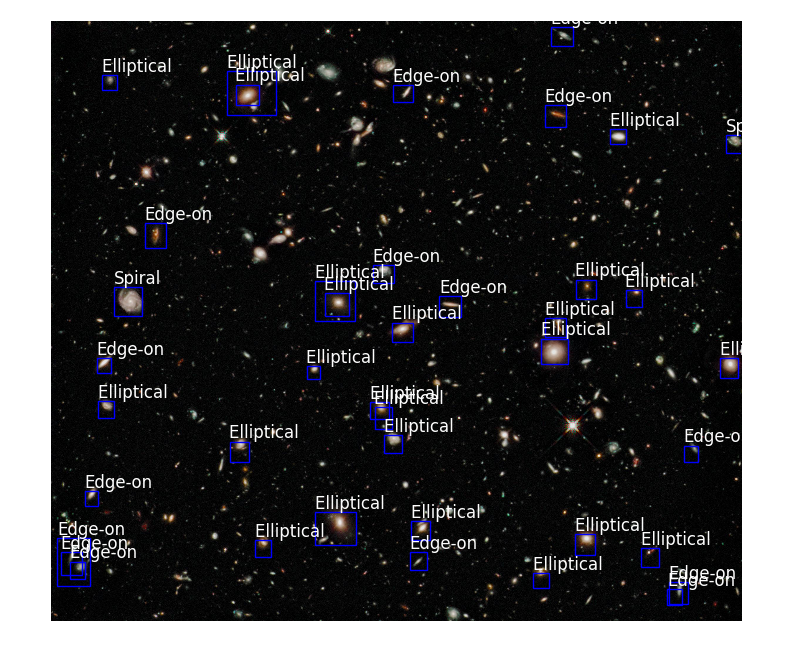

In [5]:
#plot image and detections
img = Image.open(filename)
contrast = ImageEnhance.Contrast(img)
img2 = contrast.enhance(1)
fig,ax = plt.subplots(figsize=(8,6))
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(img2)
ax.set_aspect('equal')
for output in outputs:
        r=output['right']
        l=output['left']
        t=output['top']
        b=output['bottom']
        rect = patches.Rectangle((l-4,t-3),r-l+8,b-t+4,linewidth=1,edgecolor='b',facecolor='none')      
        ax.add_patch(rect)
        ax.annotate(output['class'],(l-5,t-17),color='w',fontsize=12)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0) 
#plt.savefig('sample.jpg',dpi=220) 
plt.show()

